2
1
0
[[162.38 162.38 162.36 ... 169.74 155.1  128.31]
 [162.38 162.38 162.36 ... 169.74 155.1  128.31]
 [162.38 162.38 162.36 ... 169.74 155.1  128.31]
 ...
 [ 42.42  42.42  49.91 ... 104.21 100.08  98.37]
 [ 43.85  43.85  54.5  ... 103.69 105.1  108.07]
 [ 43.85  43.85  54.5  ... 103.69 105.1  108.07]]
3


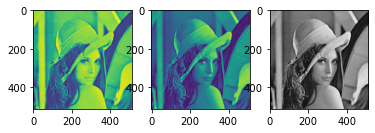

In [6]:
'''
@description: convert color image to gray image
'''
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import os
path = os.path.join(os.getcwd(),"lenna.png")

# read image
image_BGR = cv2.imread(path)
channel_num = image_BGR.shape[-1]
height_num = image_BGR.shape[0]
weight_num = image_BGR.shape[1]
image_RGB = []
plt.figure()
num = 1

# convert BGR to RGB
for i in range(channel_num-1,-1,-1):
    print(i)
    image_RGB.append(image_BGR[:,:,i])
    plt.subplot(1,channel_num,num)
    plt.imshow(image_RGB[num-1])
    num += 1
image_RGB = np.array(image_RGB).transpose(1,2,0)

# build gray image: float method
gray_float = np.zeros([height_num,weight_num])  
gray_float=image_RGB[:,:,0] * 0.3 + image_RGB[:,:,1] * 0.59 + image_RGB[:,:,2] * 0.11
# gray_float1 = gray_float1.astype('int32')
plt.imshow(gray_float,cmap="gray")


print(gray_float)
print(image_BGR.shape[-1])

[[162. 162. 162. ... 169. 155. 128.]
 [162. 162. 162. ... 169. 155. 128.]
 [162. 162. 162. ... 169. 155. 128.]
 ...
 [ 42.  42.  49. ... 104. 100.  98.]
 [ 43.  43.  54. ... 103. 105. 108.]
 [ 43.  43.  54. ... 103. 105. 108.]]
3


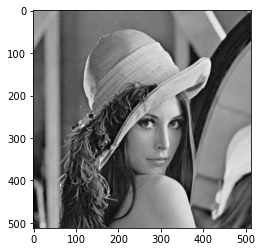

In [7]:
'''
@description: convert color image to gray image. 
@TODO: any difference between these two methods
'''
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import os
path = os.path.join(os.getcwd(),"lenna.png")

# read image
image_BGR = cv2.imread(path)
channel_num = image_BGR.shape[-1]
height_num = image_BGR.shape[0]
weight_num = image_BGR.shape[1]
plt.figure()
num = 1

# convert BGR to RGB
b,g,r = cv2.split(image_BGR)
image_RGB = cv2.merge([r,g,b])	

# build gray image: float method
gray_float = np.zeros([height_num,weight_num])  
for height in range(0,height_num,1):
    for weight in range(0,weight_num,1):
        gray_float[height,weight]=int(image_RGB[height,weight,0] * 0.3 + image_RGB[height,weight,1] * 0.59 + image_RGB[height,weight,2] * 0.11)

plt.imshow(gray_float,cmap="gray")

gray = Image.fromarray(gray_float)
gray.show()

# plt.imshow(image_RGB)
print(gray_float)
print(image_BGR.shape[-1])

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


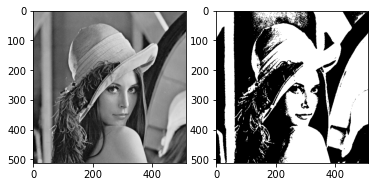

In [21]:
'''
@description: convert color image to two-value image
'''
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import os
path = os.path.join(os.getcwd(),"lenna.png")

# read image
image_BGR = cv2.imread(path)
channel_num = image_BGR.shape[-1]
height_num = image_BGR.shape[0]
weight_num = image_BGR.shape[1]
plt.figure()
num = 1

# convert BGR to RGB
b,g,r = cv2.split(image_BGR)
image_RGB = cv2.merge([r,g,b])	

# build gray image: float method
gray_float = np.zeros([height_num,weight_num])  
for height in range(0,height_num,1):
    for weight in range(0,weight_num,1):
        gray_float[height,weight]=int(image_RGB[height,weight,0] * 0.3 + image_RGB[height,weight,1] * 0.59 + image_RGB[height,weight,2] * 0.11)

plt.subplot(1,2,1)
plt.imshow(gray_float,cmap="gray")

twoValue = [0  if gray_float[i,j]/255. <= 0.5 else 1 for i in range(0,height_num,1) for j in range(0,weight_num,1)]

twoValue_result = np.resize(twoValue,(height_num,weight_num))
# print(twoValue)
print(twoValue_result)

plt.subplot(1,2,2)
plt.imshow(twoValue_result,cmap="gray")